In [39]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [40]:
# Importing the dataset
wine_quality = pd.read_csv('QualityPrediction.csv')

In [41]:
# Checking column type and if any null values are present
wine_quality.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [42]:
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [43]:
#  Classifying "quality" variable as either 1=good or 0=bad

wine_quality['classified_quality'] = [ 1 if x>5 else 0 for x in wine_quality['quality']]
dx = ['BadQuality', 'GoodQuality']

In [44]:
# Seperating X and y
feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
X = wine_quality[feature_cols]
y = wine_quality['classified_quality']

In [45]:
wine_quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'classified_quality'],
      dtype='object')

In [46]:
# Normalizing X using z-score
X_mean = X.mean()
X_std = X.std()
X_norm = (X - X_mean) / X_std

In [47]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3, random_state = 42)

In [50]:
# Set RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(random_state = 42)

In [51]:
# # Grid Search CV for Hyperparameter optimizxation
# import time
# import random
# from sklearn.model_selection import GridSearchCV

# np.random.seed(25)
# start = time.time()

# param_dist = {'max_depth': [2, 3, 4],
#               'bootstrap': [True, False],
#               'max_features': ['auto', 'sqrt', 'log2', None],
#               'criterion': ['gini', 'entropy']}

# cv_rf = GridSearchCV(rf, cv = 10,
#                      param_grid=param_dist, 
#                      n_jobs = 3)

# cv_rf.fit(X_train, y_train)
# print('Best Parameters using grid search: \n', cv_rf.best_params_)
# end = time.time()
# print('Time taken in grid search: {0: .2f}'.format(end - start))

In [52]:
# OOB rate
rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    rf.set_params(n_estimators=i)
    rf.fit(X_train, y_train)
    
    oob_error = 1 - rf.oob_score_
    error_rate[i] = oob_error

In [53]:
# Convert dictionary to a pandas series for easy plotting 
# print(error_rate)
oob_series = pd.Series(error_rate)
# print(oob_series)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

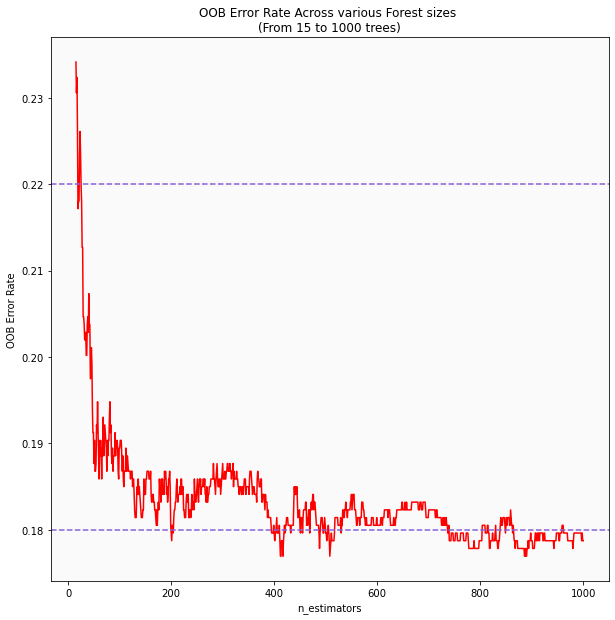

In [55]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.18, color='#875FDB',linestyle='--')
plt.axhline(0.22, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [103]:
print('OOB Error rate for 400 trees is: {0:.5f}'.format(oob_series[200]))

OOB Error rate for 400 trees is: 0.17962


In [239]:
# Refine the tree via OOB Output 
# warm start - it gives your model the power to reuse the older fitted params
rf.set_params(n_estimators=400,
                  criterion = 'entropy',
                  max_depth = 20,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=400,
                       random_state=42)

In [240]:
# Training the RF
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=400,
                       random_state=42)

In [241]:
names_index = wine_quality.columns
names_index

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'classified_quality'],
      dtype='object')

In [242]:
def variable_importance(fit):
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [243]:
var_imp_rf = variable_importance(rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [244]:
def print_var_importance(importance, indices, names_index):
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

In [245]:
print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'alcohol' has a Mean Decrease in Impurity of 0.17295
2. The feature 'sulphates' has a Mean Decrease in Impurity of 0.12745
3. The feature 'total sulfur dioxide' has a Mean Decrease in Impurity of 0.10572
4. The feature 'volatile acidity' has a Mean Decrease in Impurity of 0.10316
5. The feature 'density' has a Mean Decrease in Impurity of 0.09325
6. The feature 'chlorides' has a Mean Decrease in Impurity of 0.07534
7. The feature 'citric acid' has a Mean Decrease in Impurity of 0.06919
8. The feature 'pH' has a Mean Decrease in Impurity of 0.06801
9. The feature 'fixed acidity' has a Mean Decrease in Impurity of 0.06755
10. The feature 'free sulfur dioxide' has a Mean Decrease in Impurity of 0.05974
11. The feature 'residual sugar' has a Mean Decrease in Impurity of 0.05764


In [246]:
# Predictions
predictions_rf = rf.predict(X_test)

In [247]:
# Confusion matrix
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

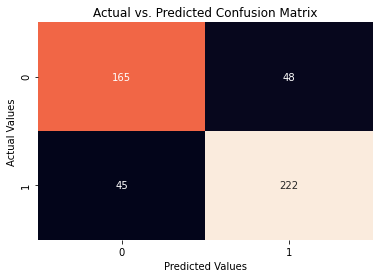

In [248]:
conf_mat = create_conf_mat(y_test, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [249]:
# Accuracy
accuracy_rf = rf.score(X_test, y_test)

print("Here is our accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our accuracy on the test set:
 0.806


In [250]:
# Error Rate
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.1937


In [251]:
# AUC
# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class
predictions_prob = rf.predict_proba(X_test)[:, 1]

fpr2, tpr2, _ = roc_curve(y_test,
                          predictions_prob,
                          pos_label = 1)

In [252]:
auc_rf = auc(fpr2, tpr2)
auc_rf

0.8852226969808865

In [253]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

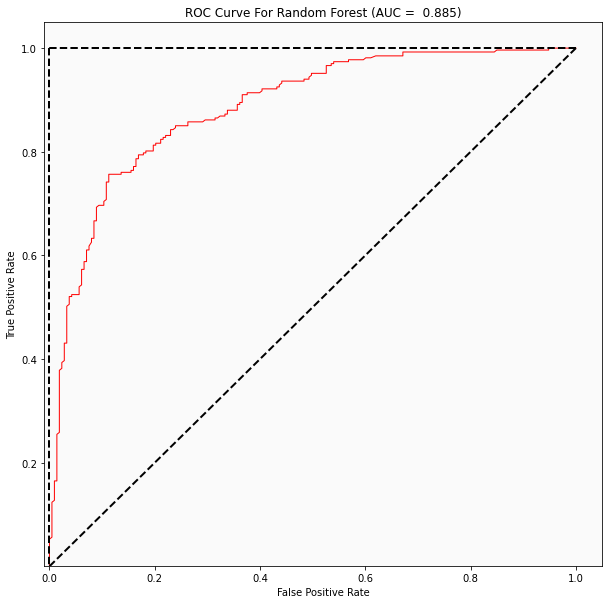

In [254]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

In [255]:
# Clasification report
from sklearn.metrics import classification_report

def print_class_report(predictions, alg_name):
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(predictions, 
            y_test, 
            target_names = dx))

In [256]:
class_report = print_class_report(predictions_rf, 'Random Forest')

Classification Report for Random Forest:
              precision    recall  f1-score   support

  BadQuality       0.77      0.79      0.78       210
 GoodQuality       0.83      0.82      0.83       270

    accuracy                           0.81       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.81      0.81      0.81       480

